# 장애인 콜택시 대기시간 예측 프로젝트 데이터 처리
## 목표
- 기상 예보를 바탕으로, 장애인 콜택시 평균 대기 시간을 예측하기.
- 장애인 이동권 개선을 위하여서, 콜택시 대기시간을 예측하는 프로젝트이다.  
- 이를 통하여 장애인 콜택시를 이용하는 고객들의 불편사항을 개선하고 서비스의 품질을 높여 교통약자의 이동 편의 증진에 기여한다.
### 목차
1. 데이터 처리  
2. **데이터 분석**
    - 개별 변수 분석하기  
        - 시각화  
        - 통계량  
    - Feature와 target 관계 분석하기  
        - 숫자형 feature들과 target과의 관계  
        - 범주형 feature들과 target과의 관계  
3. 머신러닝 모델링  
    - (나머지 3달 데이터는 테스트, 나머지는 학습데이터로 활용)  
    - MAE, MAPE를 사용해 성능 높은 모델 선정  
- 데이터 출처 : [서울시설공단_장애인콜택시 일별 이용현황](https://www.data.go.kr/data/15057705/openapi.do)  

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

import warnings
warnings.filterwarnings(action='ignore') # pd 경고메시지 생략

## 데이터 불러오기

In [2]:
# df = pd.read_csv('./data/df.csv')
df = joblib.load('./data/df.pkl')
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),year,month,week,weekday,holiday,7days_waiting_time
time,,,,,,,,,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,2015,1,1,3,1.0,NaN
2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,2015,1,1,4,0.0,NaN
2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32,2015,1,1,5,1.0,NaN
2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,2015,1,1,6,1.0,NaN
2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,2015,1,2,0,0.0,NaN


# 2. 데이터 분석

<Axes: >

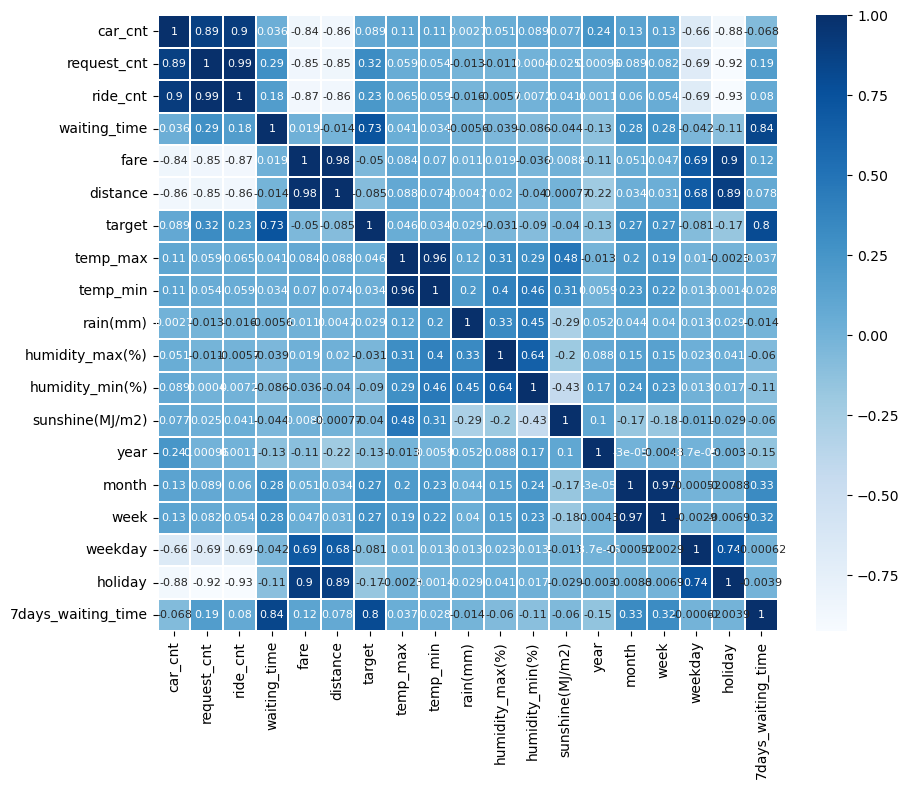

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           linecolor = "white",
            cmap = 'Blues',
            annot = True,
            annot_kws = {"size" : 8}
           )

## 개별 변수 분석

#### 개별 변수 기초 통계량

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_cnt,2923.0,418.647622,133.764485,132.0,278.0,454.0,522.0,1413.0
request_cnt,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0
ride_cnt,2923.0,3283.234348,1249.463168,462.0,1778.5,3932.0,4241.0,5189.0
waiting_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1
fare,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0
distance,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0
target,2923.0,40.292371,14.115281,0.0,29.6,38.2,48.6,96.1
temp_max,2923.0,18.073315,10.708812,-11.2,9.0,19.7,27.4,39.4
temp_min,2923.0,9.411837,10.78239,-18.5,0.5,10.0,18.9,30.4
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


In [5]:
df['holiday'].value_counts()

0.0    2005
1.0     918
Name: holiday, dtype: int64

#### 시각화

In [6]:
day_df = df.groupby('weekday').mean() # 일 별 평균 => 월:0 ~ 일:6
week_df = df.groupby('week').mean() # 주 별 평균
month_df = df.groupby('month').mean() # 월 별 평균
year_df = df.groupby('year').mean() # 년 별 평균

data_list = [day_df, week_df, month_df, year_df] # 연,월,주,일별로 데이터프레임 리스트 목록
except_col_name = ['holiday','week','weekday','month','year', '7days_waiting_time'] # holiday의 경우만 범주형데이터

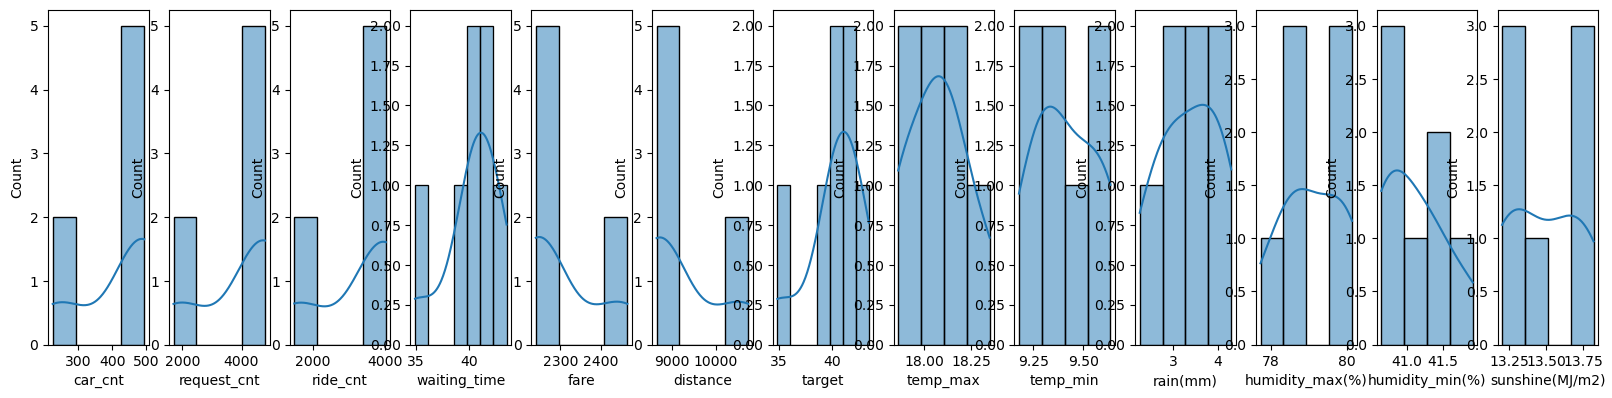

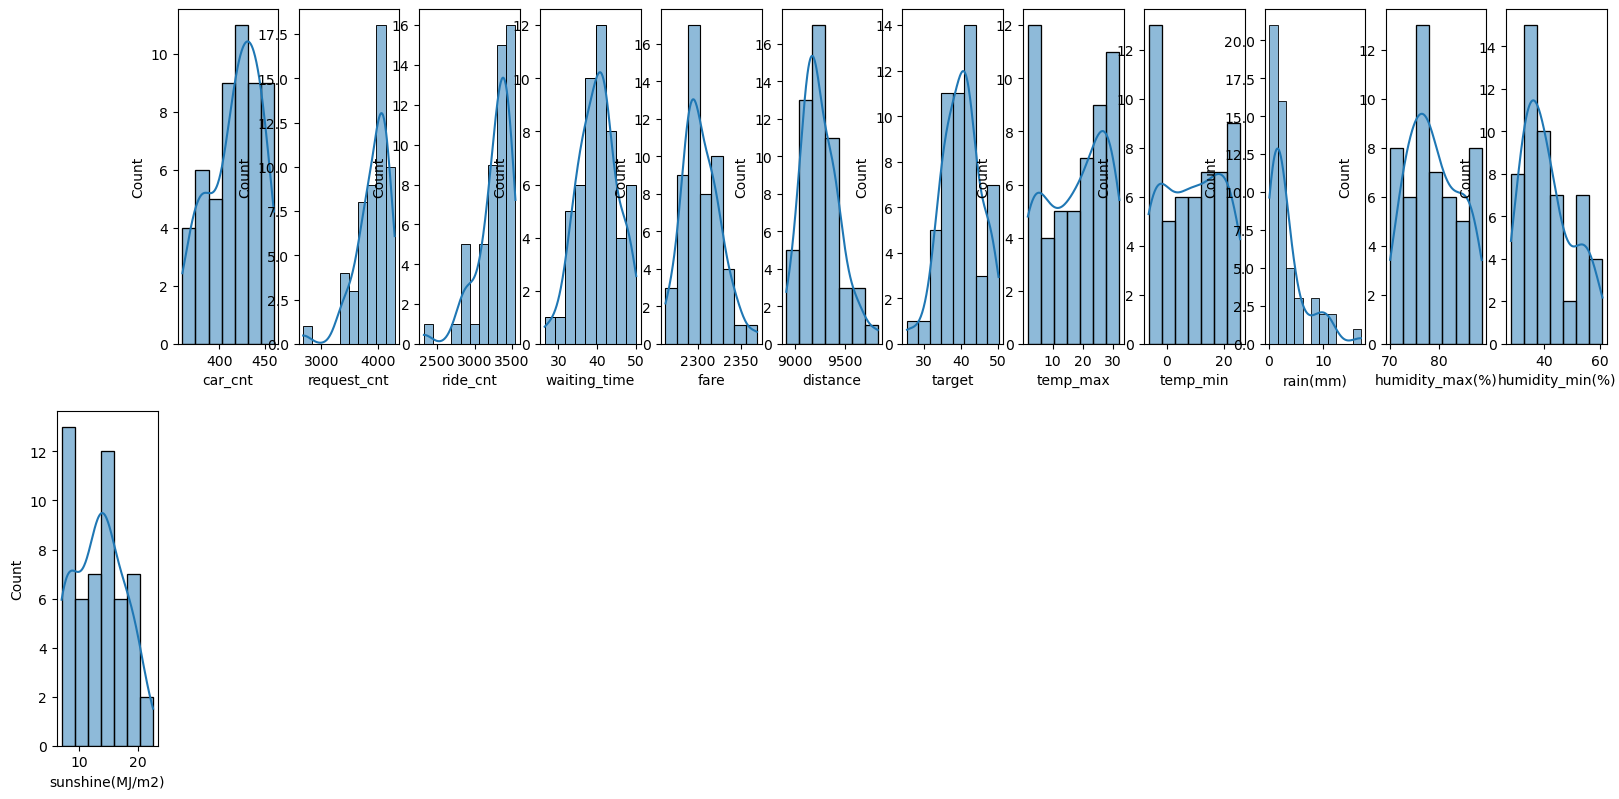

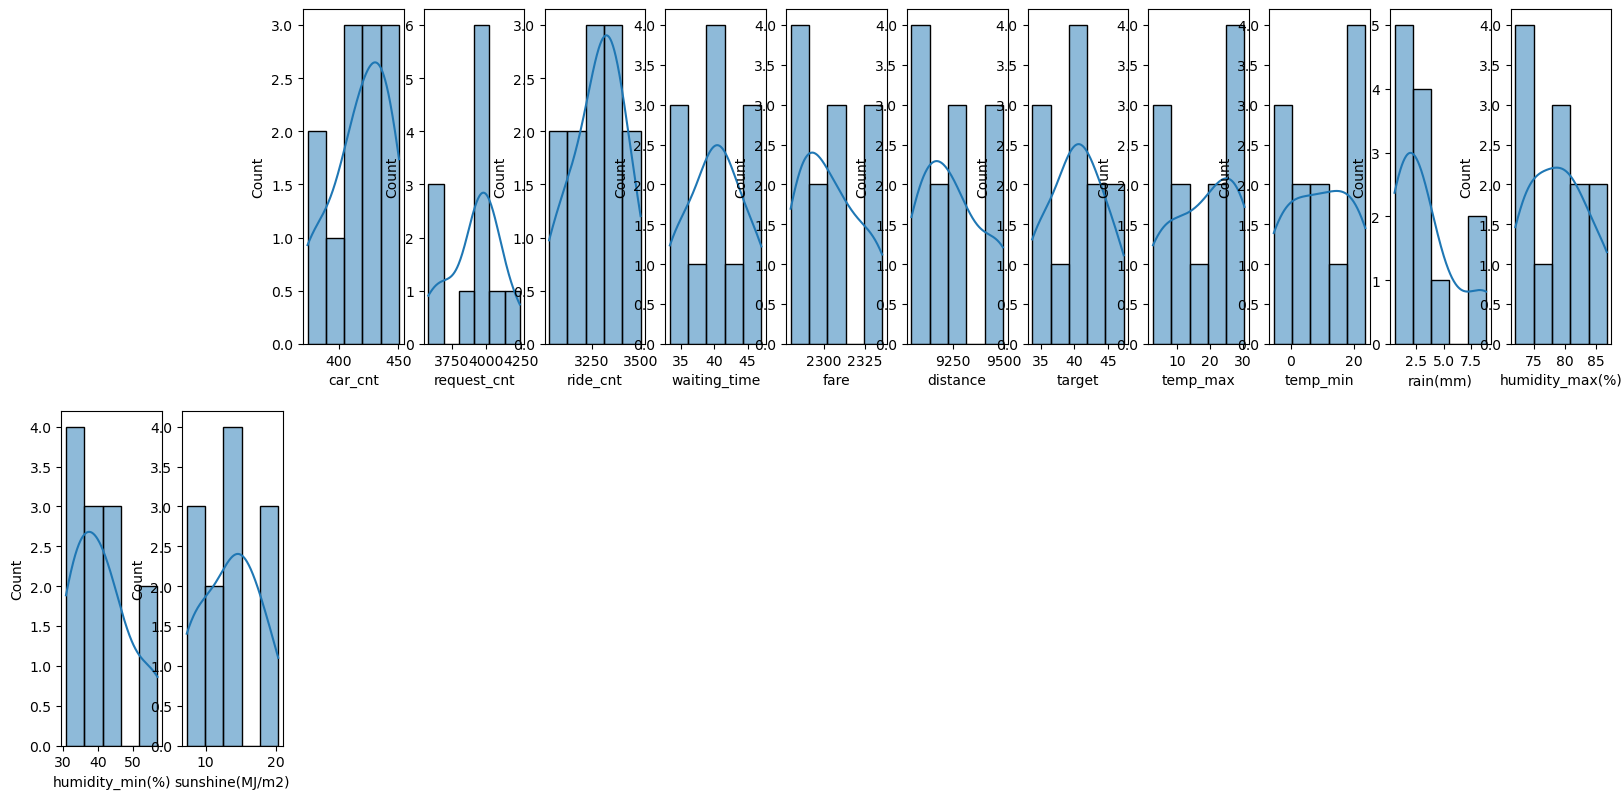

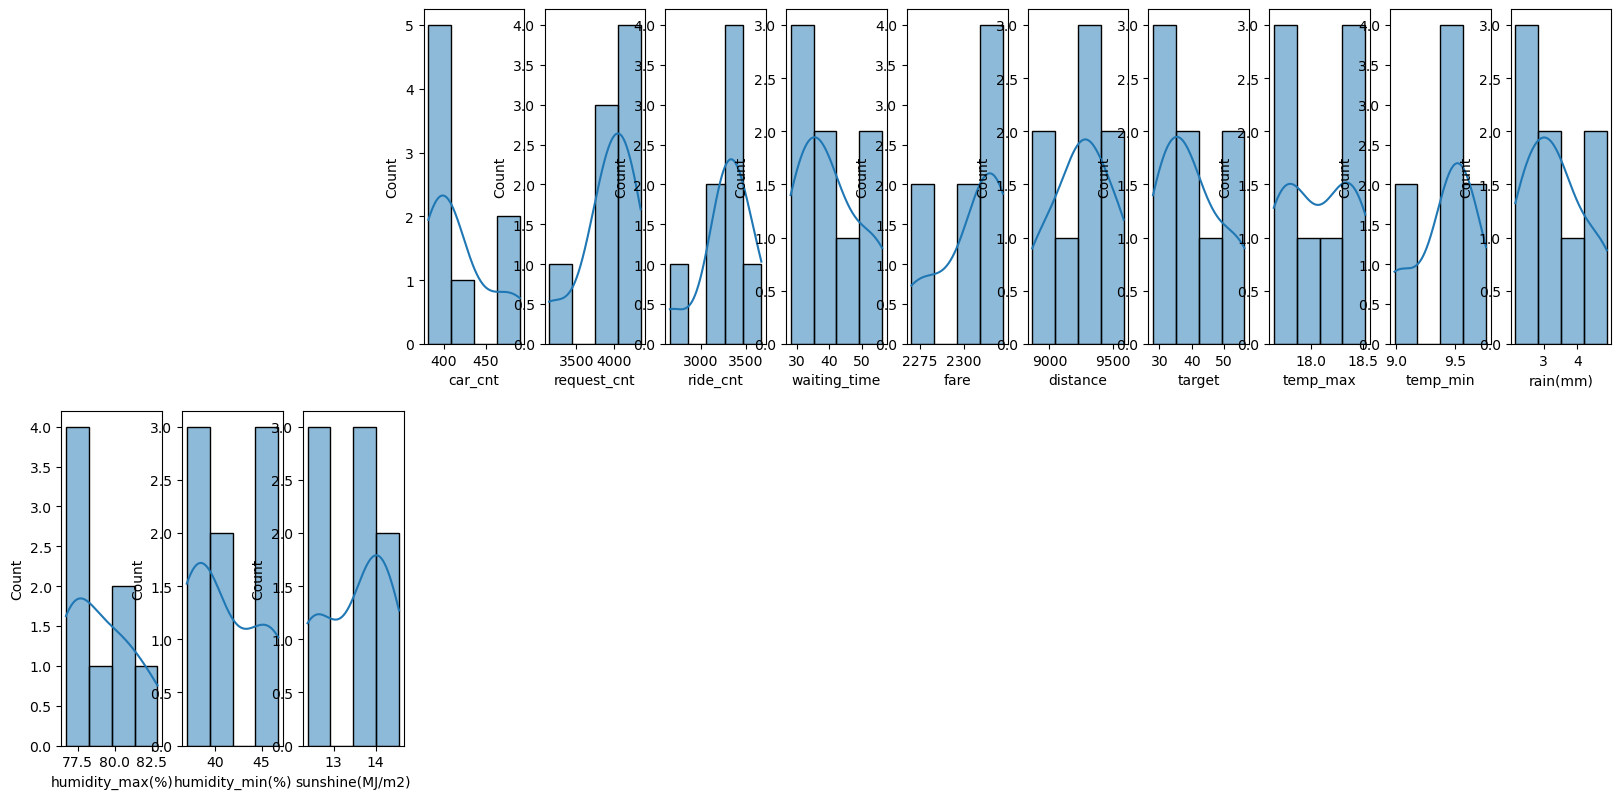

In [7]:
for i, data in enumerate(data_list): # 연,월,주,일별로 데이터 순회
    fig = plt.figure(figsize=(20, 20))
    columns = list(data.columns)
    
    # 숫자feature 컬럼만 남기기
    for col in except_col_name: 
        if col in columns:
            columns.remove(col)
    # 그래프 그리기
    for j,column in enumerate(columns):
        plt.subplot(len(data_list),len(columns), i+j+1)
        sns.histplot(x = data[column], kde=True)
    plt.show()

#### 연도별로 나눠서 확인하기

In [8]:
year_df

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,week,weekday,holiday,7days_waiting_time
year,,,,,,,,,,,,,,,,,,
2015,381.468493,3750.531507,3268.673973,34.059452,2301.523288,9558.975342,34.070959,18.518082,9.515068,2.170137,79.556164,39.432877,12.645260,6.526027,27.0,3.000000,0.309589,34.147752
2016,390.314208,4005.087432,3418.183060,38.272404,2316.404372,9581.713115,38.281421,18.348634,9.580874,2.709563,77.778689,39.811475,12.379863,6.513661,26.647541,3.008197,0.316940,38.249063
2017,405.000000,4177.890710,3465.918033,44.088525,2322.229508,9317.885246,44.078142,17.868033,8.987978,3.369399,77.306011,37.907104,12.538197,6.535519,26.606557,3.002732,0.319672,43.861358
2018,397.758904,4077.473973,3209.380822,56.322192,2319.293151,9296.868493,56.339452,17.724932,9.022192,3.518082,76.997260,37.347945,13.942630,6.526027,26.430137,2.991781,0.317808,56.414403
2019,399.068493,4104.358904,3230.279452,53.455616,2316.846575,9258.534247,53.448767,18.361644,9.482466,2.442192,76.706849,36.887123,13.750795,6.526027,26.430137,2.994521,0.317808,53.533973
2020,416.521858,3137.480874,2656.314208,28.045082,2308.505464,9181.213115,28.010656,17.648361,9.515027,4.510929,80.068306,44.822404,13.992596,6.513661,26.928962,2.997268,0.308743,28.231148
2021,468.271233,3796.821918,3344.109589,30.720822,2270.000000,8864.536986,30.732603,18.282466,9.765205,3.250685,82.876712,46.810959,14.135205,6.526027,26.578082,3.002740,0.309589,30.556556
2022,490.898630,4350.304110,3673.863014,37.466027,2280.002740,8974.227397,37.405753,17.835342,9.426301,4.863288,81.293151,45.802740,14.554575,6.526027,26.569863,3.005479,0.312329,37.470724


## Feature와 target관계 분석
- Target = waiting_time

#### 숫자 feature -> target

In [15]:
columns = list(df.columns)
remove_name = ['year','month','week','weekday', 'holiday','7days_waiting_time']
for name in remove_name:
    columns.remove(name)

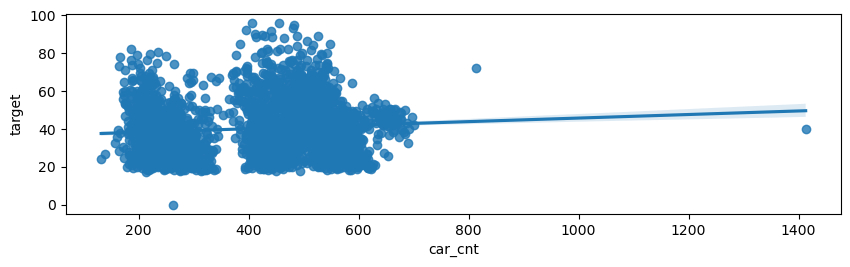

car_cnt
상관계수 : 0.03626538512838487
p-value : 0.04993899529400686


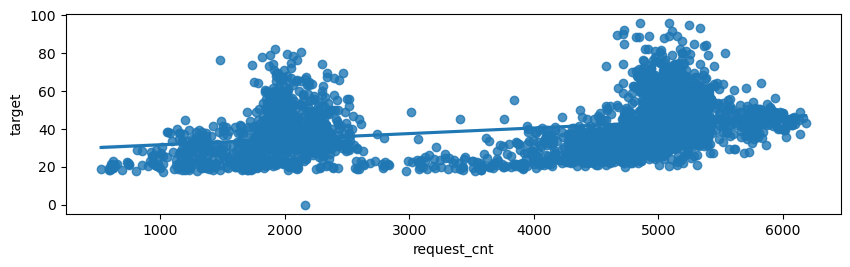

request_cnt
상관계수 : 0.2922970150283053
p-value : 1.1320389742120819e-58


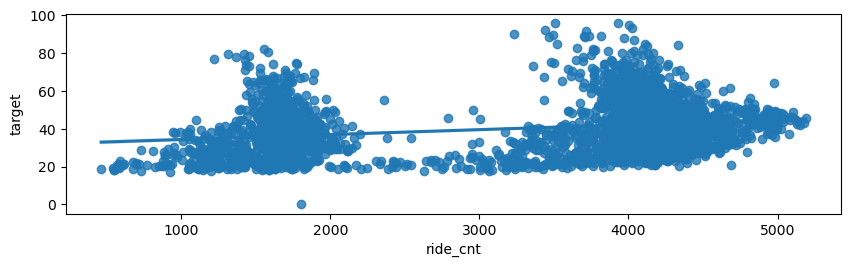

ride_cnt
상관계수 : 0.18482770066961993
p-value : 7.103181302682093e-24


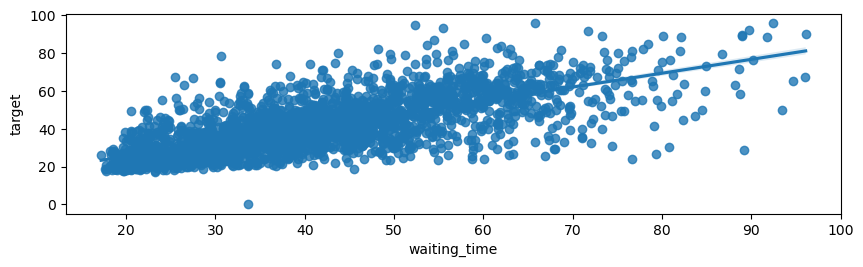

waiting_time
상관계수 : 1.0
p-value : 0.0


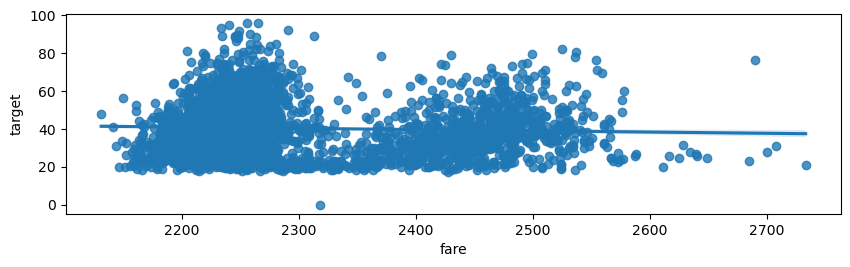

fare
상관계수 : 0.019275558620166167
p-value : 0.29751378491260455


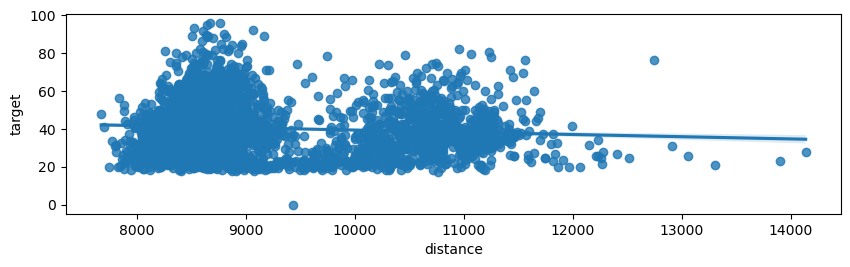

distance
상관계수 : -0.014135443393973181
p-value : 0.4449024847455225


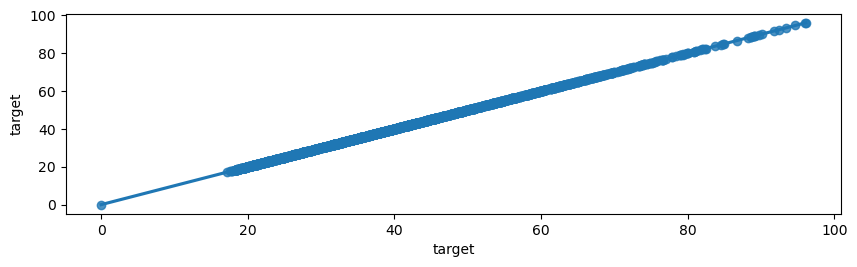

target
상관계수 : 0.7318235797217056
p-value : 0.0


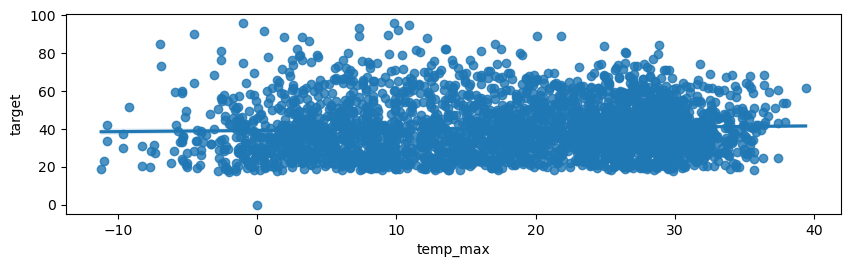

temp_max
상관계수 : 0.04087748604558668
p-value : 0.02710443177529893


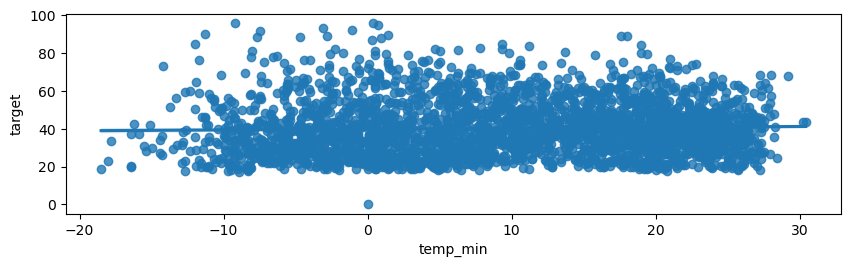

temp_min
상관계수 : 0.034409341266530516
p-value : 0.06287301933966923


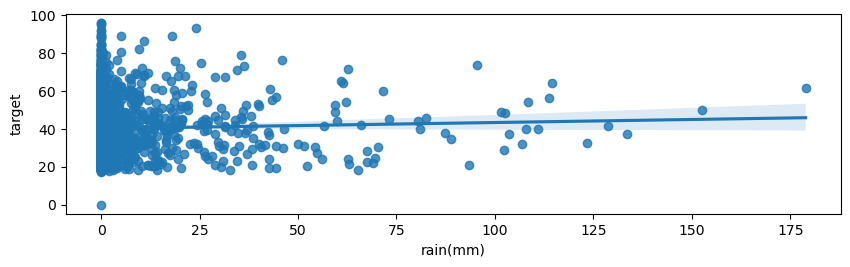

rain(mm)
상관계수 : -0.0055925386367431
p-value : 0.7624749186179521


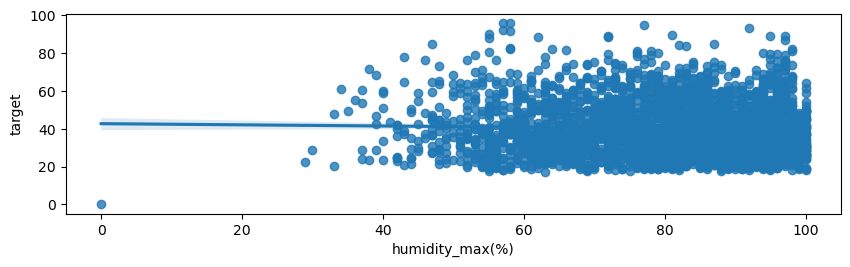

humidity_max(%)
상관계수 : -0.03926451304640815
p-value : 0.03377584137543668


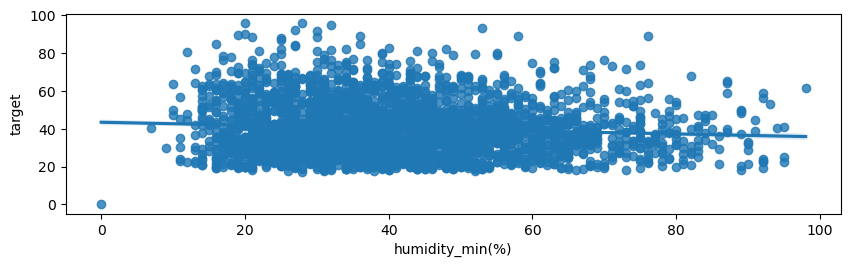

humidity_min(%)
상관계수 : -0.08639852370159583
p-value : 2.8987315003245333e-06


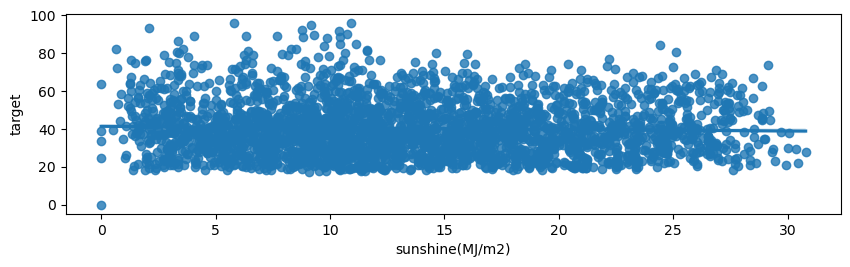

sunshine(MJ/m2)
상관계수 : -0.04373356417845979
p-value : 0.018051244406336257


In [16]:

for i, col in enumerate(columns):
    fig = plt.figure(figsize=(10, 40))
    plt.subplot(len(columns), 1,i+1)
    pic = sns.regplot(x=col, y='target', data=df)
    plt.show(pic)
    print(f"{col}\n상관계수 : {spst.pearsonr(df[col], df['waiting_time'])[0]}\np-value : {spst.pearsonr(df[col], df['waiting_time'])[1]}")

#### 범주 feature -> target

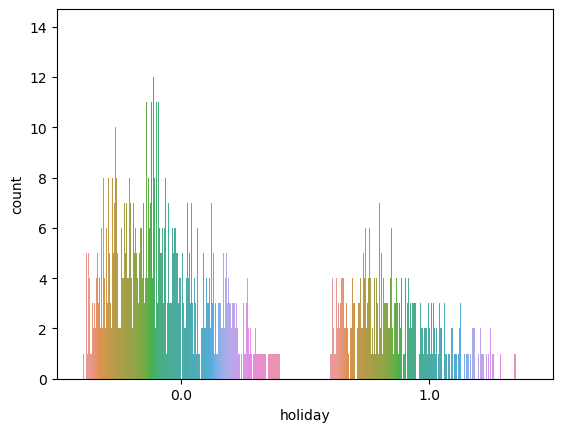

In [17]:
sns.countplot(x='holiday',hue='target', data=df).get_legend().remove()

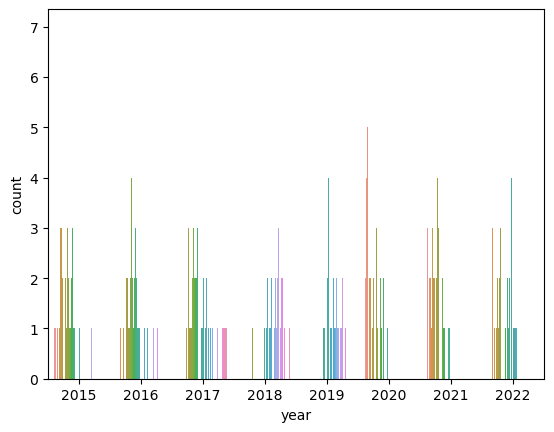

In [18]:
sns.countplot(x='year',hue='target', data=df).get_legend().remove()

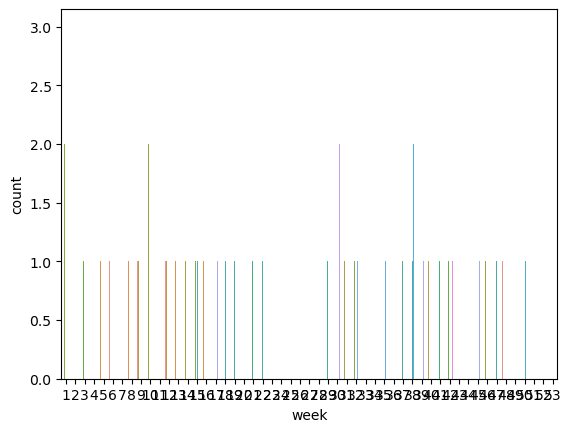

In [19]:
sns.countplot(x='week',hue='target', data=df).get_legend().remove()

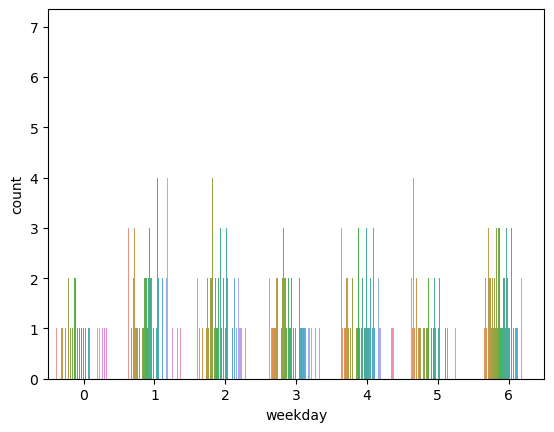

In [20]:
sns.countplot(x='weekday',hue='target', data=df).get_legend().remove()

## 변수 정리
* 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1

In [22]:
df.corr()['target'].sort_values(ascending=False)

target                1.000000
7days_waiting_time    0.798203
waiting_time          0.731824
request_cnt           0.317184
month                 0.273668
week                  0.268668
ride_cnt              0.230354
car_cnt               0.089034
temp_max              0.045891
temp_min              0.034394
rain(mm)              0.028689
humidity_max(%)      -0.030642
sunshine(MJ/m2)      -0.040099
fare                 -0.049700
weekday              -0.080956
distance             -0.084738
humidity_min(%)      -0.089760
year                 -0.126678
holiday              -0.167178
Name: target, dtype: float64

* 강한 관계의 변수  
    - 7days_waiting_time  
    - waiting_time          
* 중간(약한) 관계의 변수  
    - request_cnt           
    - month
    - week
    - holiday
    - year
    - ride_cnt
    
* (거의) 관계가 없는 변수  
    - temp_max              
    - temp_min              
    - fare  
    - distance  
    - rain  
    - sunshine(MJ/m2)
    - weekday              
    - humidity_max(%)
    - humidity_min(%)